## Different Behavior of Casual and Annual Riders in a Bike-Share Cyclists Company using R


### Table of Contents
1. [Introduction](#introduction)
2. [Ask](#Ask)
3. [Prepare](#Prepare)
4. [Process](#Process)
5. [Analysis](#Analysis)
6. [Share](#Share)
7. [Act](#Act)

# Introduction
In this capstone project for the [Google Data Analytics Capstone certificate ](http:/https://www.coursera.org/learn/google-data-analytics-capstone/home/module/3/), I have worked with a fictional company, **Bike-Share Cyclist**, to analyze rider behavior using RStudio. The objective of this project is to explore the differences between two types of **casual** and **annual** riders in order to turn casual riders into annaul ones. The analysis follows the six stages of the data analysis process: **ask, prepare, process, analyze, share,** and **act**.  

### Six Stages of Data Analysis:
   1. **Ask**: Defining the key business questions related to rider behavior.
   2. **Prepare**: Collecting and cleaning data from relevant sources.
   3. **Process**: Structuring and transforming data for analysis.
   4. **Analyze**: Conducting statistical analysis and deriving insights from the data.
   5. **Share**: Presenting the findings in a clear, actionable format.
   6. **Act**: Providing recommendations based on the analysis to improve business performance.


# Ask
In this stage, the primary goal is to define bussiness task that the analysis will address. For this project, the main business task is:  
**Find the differences between casual riders and annual members?**

#### Guiding Questions:
* What are the differences in the riding behavior between **casual riders** and **annual members** (e.g., ride duration, frequency, and time of day)?
* How do these groups behave on different days of the week, or month?
* where are the most common start station for both of these groups?
* what type of bicycle is used the most?

#### key tasks:
* Identify the business task
* Consider key stakeholders

# Prepare 
I use Cyclistic’s historical trip data to analyze and identify trends. The company gave an access to [Previous 12 months of cyclistic trip data](https://divvy-tripdata.s3.amazonaws.com/index.html) datasets. The data has been made available by Motivate International Inc. under this [license](https://divvybikes.com/data-license-agreement). This is public data that i use to explore how different customer types are using Cyclistic bikes. But due to data-privacy issues, i cant use riders’ personally identifiable information.  

#### key tasks:
* Download data and store it appropriately.
* Identify how it’s organized.
* Sort and filter the data.
* Determine the credibility of the data


In [1]:
# installation and loading packages:
library(tidyverse)
library(janitor)
library(lubridate)
library(skimr)
library(leaflet)
library(tidygeocoder)
library(gridExtra)
library(maps)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map




In [2]:
## importing datasets 
month_01 <- read_csv("/kaggle/input/bike-share-datasets-for-2024/202401-divvy-tripdata.csv")
month_02 <- read_csv("/kaggle/input/bike-share-datasets-for-2024/202402-divvy-tripdata.csv")
month_03 <- read_csv("/kaggle/input/bike-share-datasets-for-2024/202403-divvy-tripdata.csv")
month_04 <- read_csv("/kaggle/input/bike-share-datasets-for-2024/202404-divvy-tripdata.csv")
month_05 <- read_csv("/kaggle/input/bike-share-datasets-for-2024/202405-divvy-tripdata.csv")
month_06 <- read_csv("/kaggle/input/bike-share-datasets-for-2024/202406-divvy-tripdata.csv")
month_07 <- read_csv("/kaggle/input/bike-share-datasets-for-2024/202407-divvy-tripdata.csv")
month_08 <- read_csv("/kaggle/input/bike-share-datasets-for-2024/202408-divvy-tripdata.csv")
month_09 <- read_csv("/kaggle/input/bike-share-datasets-for-2024/202409-divvy-tripdata.csv")
month_10 <- read_csv("/kaggle/input/bike-share-datasets-for-2024/202410-divvy-tripdata.csv")
month_11 <- read_csv("/kaggle/input/bike-share-datasets-for-2024/202411-divvy-tripdata.csv")
month_12 <- read_csv("/kaggle/input/bike-share-datasets-for-2024/202412-divvy-tripdata.csv")


Rows: 144873 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 223164 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 301687 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

In [ ]:
# checking the columns names to make sure each dataset has the same columns
colnames(month_01)   
colnames(month_02)
colnames(month_03)
colnames(month_04)
colnames(month_05)
colnames(month_06)
colnames(month_07)
colnames(month_08)
colnames(month_09)
colnames(month_10)
colnames(month_11)
colnames(month_12)

In [ ]:
#checking data type for consistency 
str(month_01)
str(month_02)
str(month_03)
str(month_04)
str(month_05)
str(month_06)
str(month_07)
str(month_08)
str(month_09)
str(month_10)
str(month_11)
str(month_12)

# Process
In this phase of analysis, we should find and eliminate any errors and inaccuracy that can get in the way of result by:  
1) choosing the right platform to work with
2) combining two or more dataset to make information more complete
3) cleaning data
4) removing outliers (data points that skew the information)
 
#### key tasks
Check the data for errors

In [3]:
# merging datasets together
year_2024 <- bind_rows (month_01, month_02, month_03, month_04, month_05, month_06, month_07,month_08, month_09, month_10, month_11, month_12)

Now it's time to make sure transformation has been done successfully. Plus, checking for data integrity to make sure data is accurate.

In [4]:
# checking merged data and clean it 

str(year_2024)   #checking for data structure

 
# making sure all data has been transformed
nrow(year_2024)         #total rows of merged dataset
sum(nrow(month_01), nrow(month_02), nrow(month_03), nrow(month_04),    #total rows of each dataset separately 
                    nrow(month_05), nrow(month_06), nrow(month_07), nrow(month_08), 
                         nrow(month_09), nrow(month_10), nrow(month_11), nrow(month_12))

# checking for data columns
colnames(year_2024)


#checking if the column names are in a standard way
year_2024 <- clean_names (year_2024)


# triming white spaces in data
year_2024 <- lapply(year_2024, function(x) {
  if(is.character(x)) {
    trimws(x)
  } else {
    x
  }
})

#checking for duplicated data 
any(duplicated(year_2024))



spc_tbl_ [5,860,568 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5860568] "C1D650626C8C899A" "EECD38BDB25BFCB0" "F4A9CE78061F17F7" "0A0D9E15EE50B171" ...
 $ rideable_type     : chr [1:5860568] "electric_bike" "electric_bike" "electric_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:5860568], format: "2024-01-12 15:30:27" "2024-01-08 15:45:46" ...
 $ ended_at          : POSIXct[1:5860568], format: "2024-01-12 15:37:59" "2024-01-08 15:52:59" ...
 $ start_station_name: chr [1:5860568] "Wells St & Elm St" "Wells St & Elm St" "Wells St & Elm St" "Wells St & Randolph St" ...
 $ start_station_id  : chr [1:5860568] "KA1504000135" "KA1504000135" "KA1504000135" "TA1305000030" ...
 $ end_station_name  : chr [1:5860568] "Kingsbury St & Kinzie St" "Kingsbury St & Kinzie St" "Kingsbury St & Kinzie St" "Larrabee St & Webster Ave" ...
 $ end_station_id    : chr [1:5860568] "KA1503000043" "KA1503000043" "KA1503000043" "13193" ...
 $ start_lat         : num [1:58

[1] 5860568

[1] 5860568

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] FALSE

In [5]:
#calculating trip duration
year_2024$trip_duration <- as.numeric(difftime(year_2024$ended_at, year_2024$started_at, units = "hours"))   #convert it into mins


# adding a weekday column 
year_2024$weekday <- wday(year_2024$started_at, label = TRUE) 


# convert our data into data frame
year_2024 <- as.data.frame(year_2024)

#check some random data
sample_n(year_2024,10)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,weekday
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<ord>
1180030A0439692C,electric_bike,2024-09-18 08:09:16,2024-09-18 08:15:29,Clark St & Newport St,632,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,41.94454,-87.65468,41.93669,-87.63683,member,0.10351250,Wed
9EAA9C2D1E3E48C8,electric_bike,2024-05-17 17:28:21,2024-05-17 17:55:43,Avers Ave & Belmont Ave,15640,Clark St & Armitage Ave,13146,41.93941,-87.72362,41.91831,-87.63628,casual,0.45611111,Fri
567CBBC95604D3CA,electric_bike,2024-03-12 17:56:14,2024-03-12 17:58:38,Indiana Ave & Roosevelt Rd,SL-005,Michigan Ave & 8th St,623,41.86813,-87.62300,41.87277,-87.62398,casual,0.04000000,Tue
F977A22924D5C971,classic_bike,2024-08-25 11:20:46,2024-08-25 11:54:14,Ashland Ave & Division St,13061,Theater on the Lake,TA1308000001,41.90345,-87.66775,41.92628,-87.63083,member,0.55779028,Sun
99716BFF8E07788E,classic_bike,2024-08-14 21:04:00,2024-08-14 21:38:33,Broadway & Sheridan Rd,13323,Field Blvd & South Water St,15534,41.95283,-87.64999,41.88635,-87.61752,member,0.57575000,Wed
38C151937F9B2DCE,electric_bike,2024-07-06 23:15:11,2024-07-06 23:18:13,Clark St & Elm St,TA1307000039,Wells St & Concord Ln,TA1308000050,41.90274,-87.63170,41.91213,-87.63466,casual,0.05062806,Sat
030BE69315411ED7,classic_bike,2024-12-23 17:18:35,2024-12-23 17:41:57,Lavergne Ave & Fullerton Ave,21356,Lavergne Ave & Fullerton Ave,21356,41.92403,-87.75119,41.92403,-87.75119,casual,0.38944417,Mon
2D7B8874AD1D56BD,electric_bike,2024-09-04 17:50:48,2024-09-04 18:11:29,NA,NA,Broadway & Cornelia Ave,13278,41.91000,-87.63000,41.94553,-87.64644,member,0.34485972,Wed
7468B3768F15FC29,classic_bike,2024-10-17 15:49:22,2024-10-17 16:37:25,Michigan Ave & 18th St,13150,Streeter Dr & Grand Ave,13022,41.85793,-87.62434,41.89228,-87.61204,casual,0.80079750,Thu


In [6]:
#checking if there is any inaccurate data
neg_duration <- filter(year_2024, trip_duration <= 0)
nrow(neg_duration)

#removing inaccurate data
year_2024 <- year_2024 %>%
filter(trip_duration >0)


[1] 723

Since there are missing values in start_station_names and on the other hand no missing values for start_lat and start_lng, there are changes a missing station names has been appeared in other row.

In [7]:
# Step 1: Create a lookup table with the most frequent station name per (lat, lng)
station_lookup <- year_2024 %>%
  filter(!is.na(start_station_name)) %>%
  group_by(start_lat, start_lng) %>%
  summarise(start_station_name = names(sort(table(start_station_name), decreasing = TRUE))[1], .groups = "drop") # Picks the most frequent name
nrow(station_lookup)

# Step 2: Join this lookup table to fill missing station names
year <- year_2024 %>%
  left_join(station_lookup, by = c("start_lat", "start_lng")) %>%
  mutate(start_station_name = coalesce(start_station_name.x, start_station_name.y)) %>%
  select(-start_station_name.x, -start_station_name.y)  # Remove extra columns


#step 3: Checking for missing values in start_station_names
sapply (year, function(x)  sum(is.na(x)))


[1] 976717

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
  start_station_id   end_station_name     end_station_id          start_lat 
           1073569            1104195            1104195                  0 
         start_lng            end_lat            end_lng      member_casual 
                 0               7232               7232                  0 
     trip_duration            weekday start_station_name 
                 0                  0            1073569

Now, i realized its impossible to find missing start_station_name values in the original dataset itself. Therefore, i used **tidygeocoder** package for filling up the missing values.

In [8]:

# Filter missing start_station_name
unique_locations <- year_2024 %>%
  filter(is.na(start_station_name)) %>%
  distinct(start_lat, start_lng)

# Step 2: Perform Batch Reverse Geocoding
geocoded_data <- unique_locations %>%
  reverse_geocode(lat = start_lat, long = start_lng, method = "osm") # OpenStreetMap API



Passing 725 coordinates to the Nominatim single coordinate geocoder

Query completed in: 727 seconds



In [3]:
# Step 3: Merge Back to Original Data
year_2024 <- year_2024 %>%
  left_join(geocoded_data, by = c("start_lat", "start_lng")) %>%
  mutate(start_station_name = coalesce(start_station_name, address),  # Fill missing 'start_station_name' with 'address'
         start_station_name = strsplit(start_station_name, ",") %>%
           sapply(function(x) paste(x[1:2], collapse = " &"))) %>%  # Extract first two parts and replace commas with '&'
  select(-address)  # Remove the original 'address' column

In [4]:
#checking for missing values in start_staion_name
sapply(year_2024, function(x) sum(is.na(x)))

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
                 0            1073569            1104195            1104195 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               7232               7232 
     member_casual      trip_duration            weekday 
                 0                  0                  0

In [5]:
#creating a list of missing lat and lng values
missing_lat_lng <- year_2024 %>%
filter(is.na(end_lat) | is.na(end_lng)) 
nrow(missing_lat_lng)

#making sure if end_station_name is also missing when lat and lng are missing
sapply(missing_lat_lng, function(x)  sum(is.na(x)))

[1] 7232

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
                 0                  0               7232               7232 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               7232               7232 
     member_casual      trip_duration            weekday 
                 0                  0                  0

In [6]:
#checking percentage of missing end_lat and end_lng to total
colSums(is.na(year_2024)) / nrow(year_2024) * 100   #missing values are 0.1 percent of total data
nrow(year_2024)


ride_id      rideable_type         started_at           ended_at 
         0.0000000          0.0000000          0.0000000          0.0000000 
start_station_name   start_station_id   end_station_name     end_station_id 
         0.0000000         18.3207747         18.8434165         18.8434165 
         start_lat          start_lng            end_lat            end_lng 
         0.0000000          0.0000000          0.1234162          0.1234162 
     member_casual      trip_duration            weekday 
         0.0000000          0.0000000          0.0000000

[1] 5859845

In [7]:
# creating a list with complete station_name, lat, and lng
location <- year_2024 %>%
select(start_station_name, start_lat, start_lng) %>%
group_by(start_lat, start_lng) %>%
summarise(start_station_name = names(sort(table(start_station_name), decreasing = TRUE))[1], .groups = "drop")%>%
rename(end_station_name = start_station_name, end_lat = start_lat, end_lng = start_lng)
nrow(location)


[1] 977442

In [8]:
# filling missing end_station_name values
year_2024 <- year_2024 %>%
left_join(location, by = c("end_lat", "end_lng"), suffix = c("", "_new")) %>%
mutate(end_station_name = coalesce(end_station_name, end_station_name_new)) %>%  #filling missing values
select (- end_station_name_new)   # removing extra column


In [9]:
# checking random data
sample_n(year_2024,10)


#checking missing values in our data
sapply(year_2024, function(x) sum(is.na(x)))

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,weekday
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<ord>
836EFFF9F60E1B33,classic_bike,2024-08-24 18:34:09,2024-08-24 18:40:52,Broadway & Berwyn Ave &NA &NA,13109,Winthrop Ave & Lawrence Ave,TA1308000021,41.97836,-87.65979,41.96881,-87.65766,member,0.11192806,Sat
9720169952319F19,classic_bike,2024-08-14 19:59:34,2024-08-14 20:01:13,Dearborn Pkwy & Delaware Pl &NA &NA,TA1307000128,Clark St & Chicago Ave,13303,41.89897,-87.62991,41.89675,-87.63089,member,0.02768000,Wed
4DAD56FE12E7B15C,classic_bike,2024-09-02 14:27:00,2024-09-02 15:11:42,Millennium Park &NA &NA,13008,DuSable Lake Shore Dr & Belmont Ave,TA1309000049,41.88103,-87.62408,41.94078,-87.63919,casual,0.74488806,Mon
28A33858033F455F,classic_bike,2024-03-04 06:33:14,2024-03-04 06:44:40,Elston Ave & Cortland St &NA &NA,TA1305000039,Larrabee St & Kingsbury St,TA1306000009,41.91643,-87.66675,41.89776,-87.64288,member,0.19055556,Mon
DDE199204B25D3ED,classic_bike,2024-10-22 18:26:12,2024-10-22 18:33:33,Broadway & Sheridan Rd &NA &NA,13323,Clark St & Grace St,TA1307000127,41.95283,-87.64999,41.95078,-87.65917,member,0.12238417,Tue
A3C59D19FA07112A,classic_bike,2024-06-01 22:25:03,2024-06-01 22:40:58,Shedd Aquarium &NA &NA,15544,Dusable Harbor,KA1503000064,41.86723,-87.61536,41.88698,-87.61281,casual,0.26538194,Sat
0ABCF82BFBE16F75,classic_bike,2024-03-07 15:48:55,2024-03-07 16:14:49,Sheffield Ave & Willow St &NA &NA,TA1306000032,Halsted St & Maxwell St,TA1309000001,41.91369,-87.65286,41.86488,-87.64707,member,0.43166667,Thu
3D9B111D7B7A6AD5,classic_bike,2024-06-05 17:31:05,2024-06-05 17:48:47,Clinton St & Lake St &NA &NA,13021,Desplaines St & Kinzie St,TA1306000003,41.88564,-87.64182,41.88872,-87.64445,member,0.29509139,Wed
E4CC7AF94F6DB6EB,classic_bike,2024-12-09 06:53:39,2024-12-09 06:56:02,Wells St & 19th St &NA &NA,SL-006,Wentworth Ave & Cermak Rd,13075,41.85680,-87.63388,41.85308,-87.63193,member,0.03960056,Mon


ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
                 0            1073569               8070            1104195 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               7232               7232 
     member_casual      trip_duration            weekday 
                 0                  0                  0

Because my missing data also includes important information so i do not remove them. 

# Analysis
Now that data is stored appropriately and has been prepared for analysis, time to put it to work. The key here is revealing difference behaviour between casual and member riders.

#### key tasks
* Aggregate your data so it’s useful and accessible.
* Organize and format your data.
* Perform calculations.
* Identify trends and relationships.

In [ ]:
# get a summary of my clean data
skim_without_charts(year_2024)

In [10]:
# member vs casual rides difference based on trip_duration
descriptive_analysis <- year_2024 %>%
group_by(member_casual) %>%
summarize (mean_trip_minutes = mean(trip_duration)*60, min_trip_minutes = min(trip_duration)*60,
           sum_trip_hour = sum(trip_duration), max_trip_hour = max(trip_duration), count = n()) %>%
as.data.frame()   #convert output into data frame


print(descriptive_analysis)

  member_casual mean_trip_minutes min_trip_minutes sum_trip_hour max_trip_hour
1        casual          25.15447     0.0008499980      901954.3      25.99889
2        member          12.77355     0.0006499966      789500.7      25.99667
    count
1 2151397
2 3708448


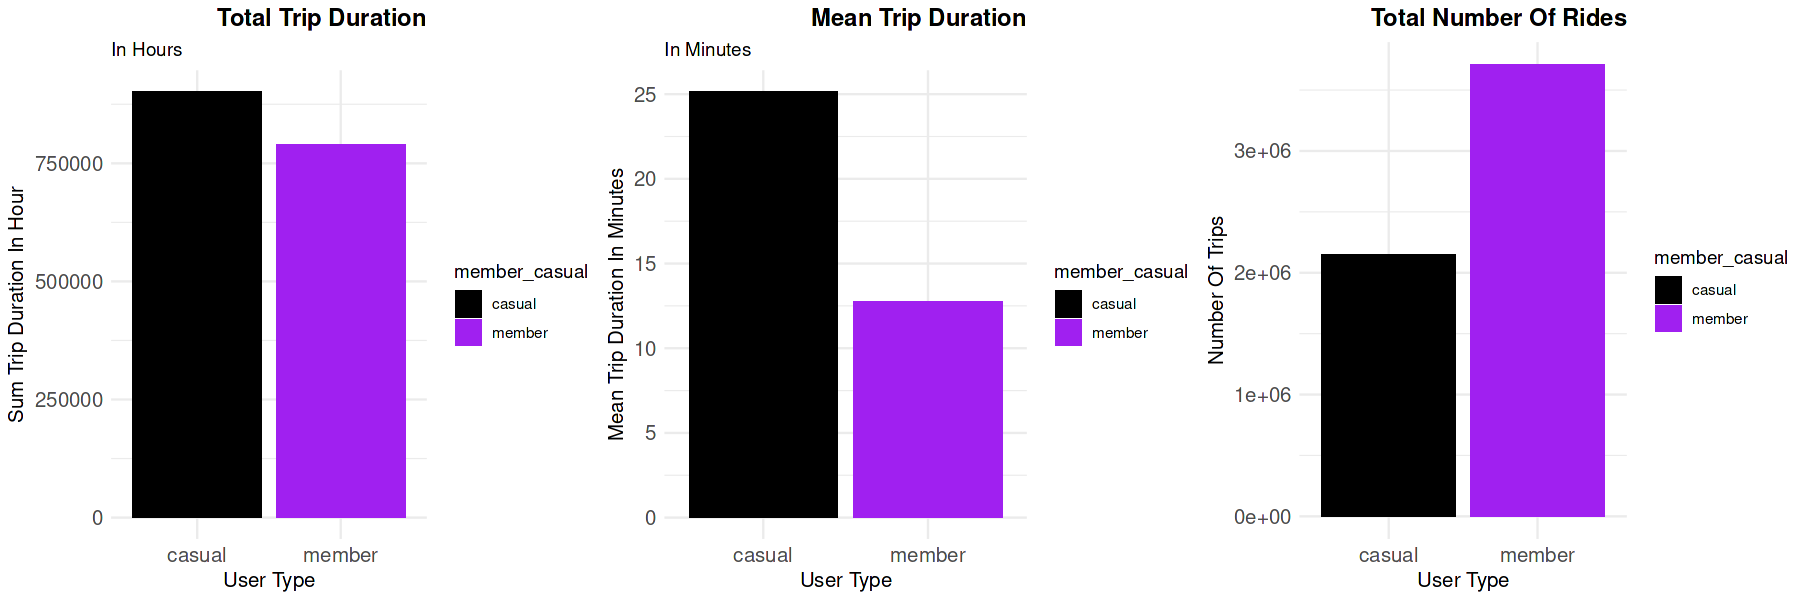

In [11]:
# Showing your data in different plots
p1 <- ggplot(data = descriptive_analysis, aes(x = member_casual, y = sum_trip_hour, fill = member_casual)) + 
  geom_col(width = 0.9) +
  scale_fill_manual(values = c("member" = "purple", "casual" = "black")) +
  labs(title = "Total Trip Duration", subtitle ="In Hours", x = "User Type", y = "Sum Trip Duration In Hour") +
  theme_minimal() +
  theme(plot.margin = margin(5, 5, 5, 5),
        plot.title = element_text(size = 14, face = "bold", hjust = 1),
       axis.title.x = element_text(size = 12),
       axis.title.y = element_text(size = 12),
       axis.text.x = element_text (size =12),
       axis.text.y = element_text (size = 12))

p2 <- ggplot(data = descriptive_analysis, aes(x = member_casual, y = mean_trip_minutes, fill = member_casual)) + 
  geom_col(width = 0.9) +
  scale_fill_manual(values = c("member" = "purple", "casual" = "black")) +
  labs(title = "Mean Trip Duration", subtitle ="In Minutes", x = "User Type", y = "Mean Trip Duration In Minutes") +
  theme_minimal() +
  theme(plot.margin = margin(5, 5, 5, 5),
        plot.title = element_text(size = 14, face = "bold", hjust = 1),
       axis.title.x = element_text(size = 12),
       axis.title.y = element_text(size = 12),
       axis.text.x = element_text (size =12),
       axis.text.y = element_text (size = 12))

p3 <- ggplot(data = descriptive_analysis, aes(x = member_casual, y = count, fill = member_casual)) +
  geom_col(width = 0.9) +
  scale_fill_manual(values = c("member"= "purple", "casual" = "black")) +
  labs(title = "Total Number Of Rides", x = "User Type", y = "Number Of Trips") +
  theme_minimal() +
  theme(plot.margin = margin(5, 5, 5, 5),
        plot.title = element_text(size = 14, face = "bold", hjust = 1),
       axis.title.x = element_text(size = 12),
       axis.title.y = element_text(size = 12),
       axis.text.x = element_text (size =12),
       axis.text.y = element_text (size = 12))

# Increase figure width
options(repr.plot.width = 15, repr.plot.height = 5)

# For combining multiple plots
grid.arrange(p1, p2, p3, ncol = 3)    # Display them side by side

##### Main Findings About Descriptive Analysis 
- **Members** constitute 63% of total riders, while **casual** riders make up 37%.
- The overall riding duration shows no significant difference, with **member** riders spending just **14%** more time in total.
- On an individual level, **casual** riders take nearly **twice** as long per trip compared to members.


In [12]:
# conducting total and mean for each month of the year
months <- year_2024 %>%
mutate(month = factor(month(started_at, label = TRUE, abbr = FALSE))) %>%    #create month column
group_by (member_casual, month) %>%    #group by user type and month of the year
summarize (count = n(),  # count trips per month 
          mean_duration_minutes = mean(trip_duration)*60,  # Convert mean trip duration to minutes
          sum_duration_hour = sum(trip_duration),  #total trip duration in hour
           .groups = "drop")  %>%
arrange(month) %>%
as.data.frame()     #convert it into data frame

print(months)

   member_casual     month  count mean_duration_minutes sum_duration_hour
1         casual   January  24446              21.31714          8685.315
2         member   January 120330              13.80174         27679.382
3         casual  February  47157              25.19308         19800.501
4         member  February 175979              12.91542         37880.723
5         casual     March  82500              24.97010         34333.887
6         member     March 219081              11.97231         43715.076
7         casual     April 131745              26.01930         57131.884
8         member     April 283092              12.36812         58355.248
9         casual       May 231047              28.04967        108013.194
10        member       May 378396              13.51814         85253.527
11        casual      June 301169              27.70558        139067.689
12        member      June 409578              13.88715         94797.874
13        casual      July 320581     

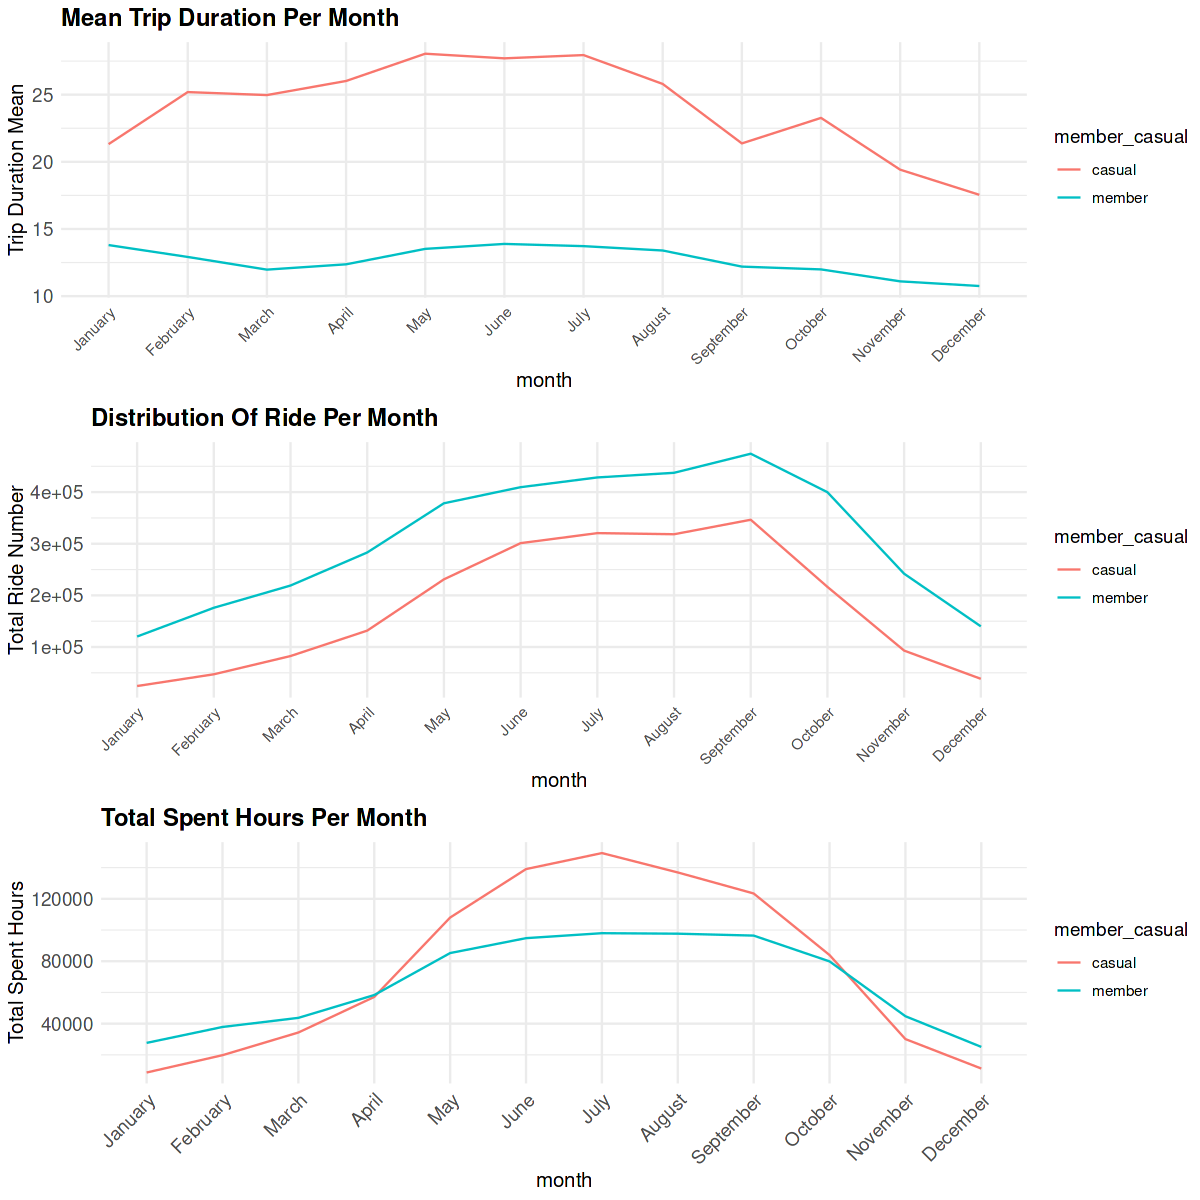

In [13]:
### illustrating differentuser type based on each month
## illustrating trip duration mean for each month based on ueser type
e1 <- ggplot(data =  months) +
geom_line(mapping = aes(x = month, y = mean_duration_minutes, color = member_casual, group = member_casual)) +
labs( title = "Mean Trip Duration Per Month", y = "Trip Duration Mean", x = "month") +
theme_minimal() +
theme(axis.text.x = element_text(angle = 45, hjust = 1),    # Rotate x-axis text
    plot.margin = margin(5,5,5,5),    # Adjust margin to prevent text cutoff
        plot.title = element_text(size =14, face ="bold"),   #make title bold
     axis.text.y = element_text (size = 11),  # adjust y label
     axis.title.x = element_text (size = 12),  #adjust x title
     axis.title.y = element_text (size = 12))  #adjust y title  

## illustrating number of trips for each month based on ueser type
e2 <- ggplot(data = months) +
geom_line (mapping = aes (x = month, y = count, color = member_casual, group = member_casual)) +
labs(title = "Distribution Of Ride Per Month", y = "Total Ride Number") +
theme_minimal() +
theme(axis.text.x = element_text(angle = 45, hjust = 1),    # Rotate x-axis text
    plot.margin = margin(5,5,5,5),
     plot.title = element_text(size =14, face ="bold"),
     axis.text.y = element_text (size = 11),
     axis.title.x = element_text (size = 12),
     axis.title.y = element_text (size = 12))  

## illustrating total spent hours in each month based on user type
e3 <- ggplot(data = months) +
geom_line(mapping = aes(x = month, y = sum_duration_hour, color = member_casual, group = member_casual)) +
labs(title = "Total Spent Hours Per Month", y = "Total Spent Hours") +
theme_minimal()  +
theme(axis.text.x = element_text (angle = 45, hjust = 1, size =11 ),  # Rotate x-axis text
      plot.margin = margin(5,5,5,5),
     plot.title = element_text(size =14, face ="bold"),   #make title bold
     axis.text.y = element_text (size = 11),  # adjust y label
     axis.title.x = element_text (size = 12),  #adjust x title
     axis.title.y = element_text (size = 12))  #adjust y title

# increase plot size
options(repr.plot.width = 10, repr.plot.height = 10)

# combining plots together 
grid.arrange(e1, e2, e3, ncol = 1)

##### Distribution Of Ride Per Month
**Seasonal Variation**:
Bike usage rises from March onwards, peaking between June and September, and declines in November and December.
This suggests that biking is more popular during warmer months.

**Member vs. Casual Trends**:
Members ride consistently more than casual riders throughout the year.
Casual riders show a sharper increase in summer months, likely due to recreational use.

##### Trip Duration Mean Per Month
**Casual Riders Take Longer Trips:**
Casual riders consistently spend more time per trip than members, with trip durations peaking in spring and summer (above 25 minutes on average).
Members' trip durations remain relatively stable, averaging around 10–12 minutes.

**Decline in Trip Duration in Colder Months:**
Both groups reduce their trip durations from October onwards, likely due to colder temperatures and unfavorable weather.

##### Total Spent Hours Per Month
**Casual Riders Spend More Time Per Ride:**
Despite having fewer rides, casual riders contribute to more total spent hours from April to October.
This confirms that casual riders take longer trips compared to members.

**Steady Usage for Members:**
Members have a more stable trend in total hours spent throughout the year.
Casual riders’ total hours drop sharply after October, indicating their biking habits are more weather-dependent.
  


In [14]:
# The most popular bike type
bike_type <- year_2024 %>%
group_by(member_casual, rideable_type) %>%
summarize (count= n(), .groups = "drop") %>% 
arrange(desc(count))%>%  #sort data from highest to lowest
as.data.frame()

print(bike_type)

  member_casual    rideable_type   count
1        member    electric_bike 1888699
2        member     classic_bike 1760627
3        casual    electric_bike 1091251
4        casual     classic_bike  974931
5        casual electric_scooter   85215
6        member electric_scooter   59122


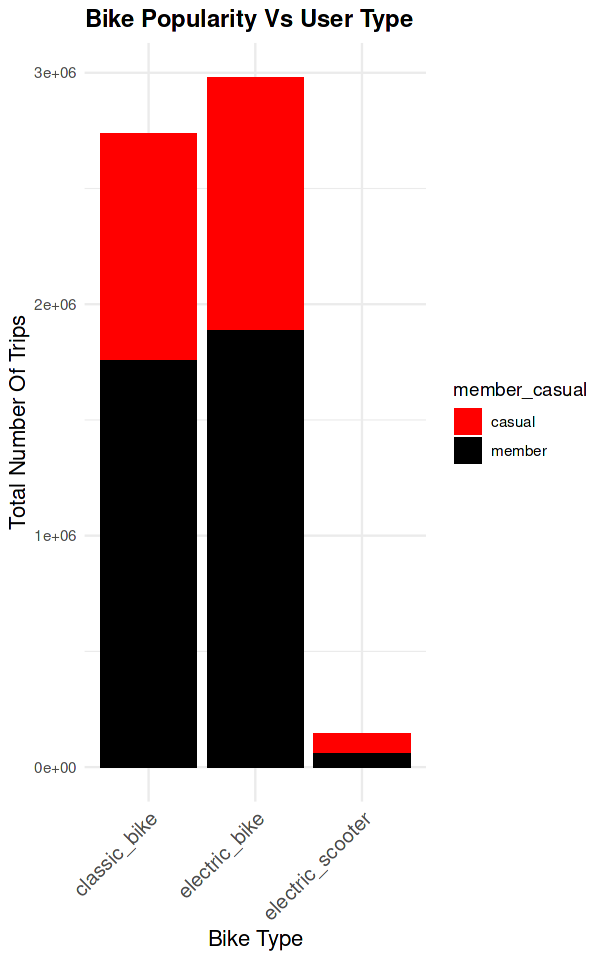

In [16]:
# illustration of bike types based on user type 
ggplot(data = bike_type) +
geom_col (mapping = aes(x = rideable_type, y = count, fill = member_casual)) +
scale_fill_manual(values = c("member" = "black", "casual" = "red")) +
labs( title = "Bike Popularity Vs User Type", x = "Bike Type", y = "Total Number Of Trips") +
theme_minimal() +
theme(axis.text.x = element_text(angle =45, size = 12, hjust=1),
     axis.title.x = element_text (size = 13),
     axis.title.y = element_text(size = 13),
     plot.title = element_text(size =14, face = "bold", hjust = 0)) 

# adjust plot size
options(repr.plot.width = 5, repr.plot.height = 6)


##### Bike Popularity Vs User Type
According to this plot, its safe to conclude that the *most* popular bike among both **casual** and **member** riders is **electric bike** and the *least* poplular one is **electric scooter**.

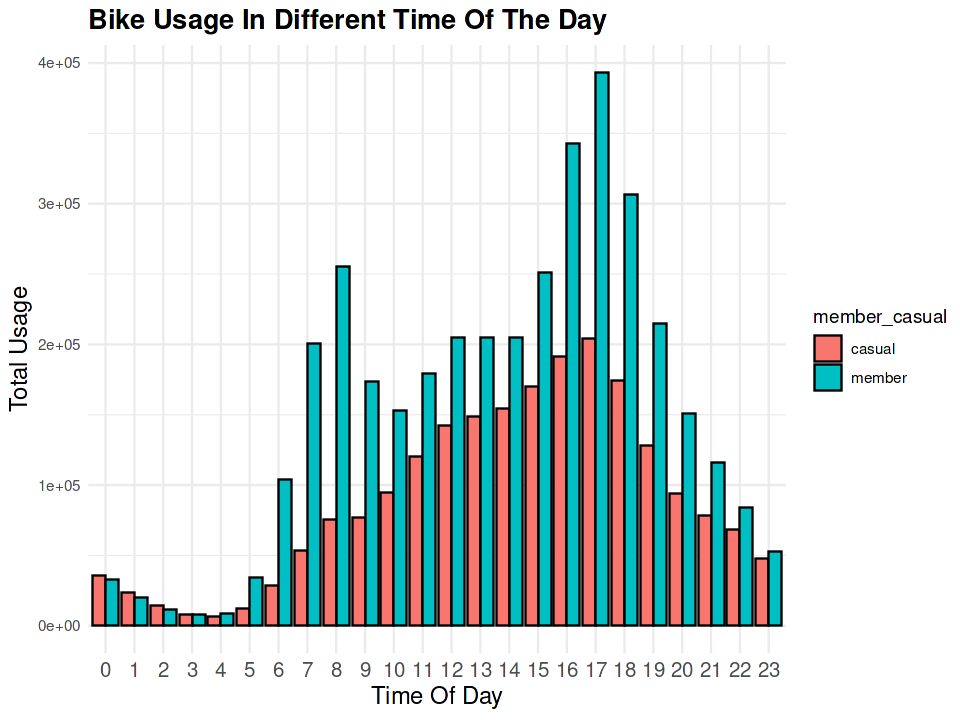

In [21]:
#conducting the usage of bike in different time of the day
ggplot(data = year_2024) +
geom_bar(mapping = aes(x = factor(hour(started_at)), fill = member_casual), position = "dodge",color = "black") +  # add a black border around bars
labs(title = "Bike Usage In Different Time Of The Day", x = "Time Of Day", y = "Total Usage") +
theme_minimal() +  #remove noise from plot
theme(axis.text.x = element_text (size =12),  # adjust x axis label
     plot.title = element_text(size = 16, face = "bold"),  #adjust plot title size
     axis.title.x = element_text(size = 14),
     axis.title.y = element_text(size = 14))

#increase plot size 
options (repr.plot.width =10, repr.plot.height = 5)

##### Bike Usage In Different Time Of The Day
- **Morning Rush** (7 AM - 9 AM): Member riders show a noticeable peak, likely reflecting their use of bikes for commuting. Casual riders remain relatively low during this period.
- **Afternoon Dip** (10 AM - 2 PM): Both groups have moderate activity, but member riders still maintain higher usage.
- **Evening Peak** (3 PM - 6 PM): Casual riders' usage significantly increases, indicating more recreational or leisure-based rides.
- **Late Night Hours** (Midnight - 6 AM): Both groups show minimal bike usage, with almost no activity in the early hours.
- **Overall Trend**: Member riders maintain steady usage throughout the day, with higher peaks in commuting hours, whereas casual riders demonstrate a sharp rise in the afternoon and early evening.

In [22]:
# condunting a dataset weekday occurance
week <- year_2024 %>%
mutate(weekday = factor(weekday, levels = c("Mon", "Tue","Wed","Thu","Fri","Sat","Sun"))) %>%  #reorder weekday to start from Mon
group_by (member_casual, weekday) %>%
summarize (count_trip = n(), mean_trip_minutes = mean(trip_duration)* 60, .groups = "drop") %>%   #create each day trip mean and trip number
arrange(weekday, member_casual) %>%   #sort based on weekday and member_casual 
as.data.frame()   #convert into data frame

print(week)


   member_casual weekday count_trip mean_trip_minutes
1         casual     Mon     253564          24.14065
2         member     Mon     534542          12.21168
3         casual     Tue     232370          21.51600
4         member     Tue     570619          12.28437
5         casual     Wed     269318          22.27959
6         member     Wed     610187          12.45279
7         casual     Thu     265072          21.91040
8         member     Thu     570519          12.25868
9         casual     Fri     315840          24.52960
10        member     Fri     525766          12.42511
11        casual     Sat     445344          28.19608
12        member     Sat     479615          14.07828
13        casual     Sun     369889          29.42470
14        member     Sun     417200          14.27493


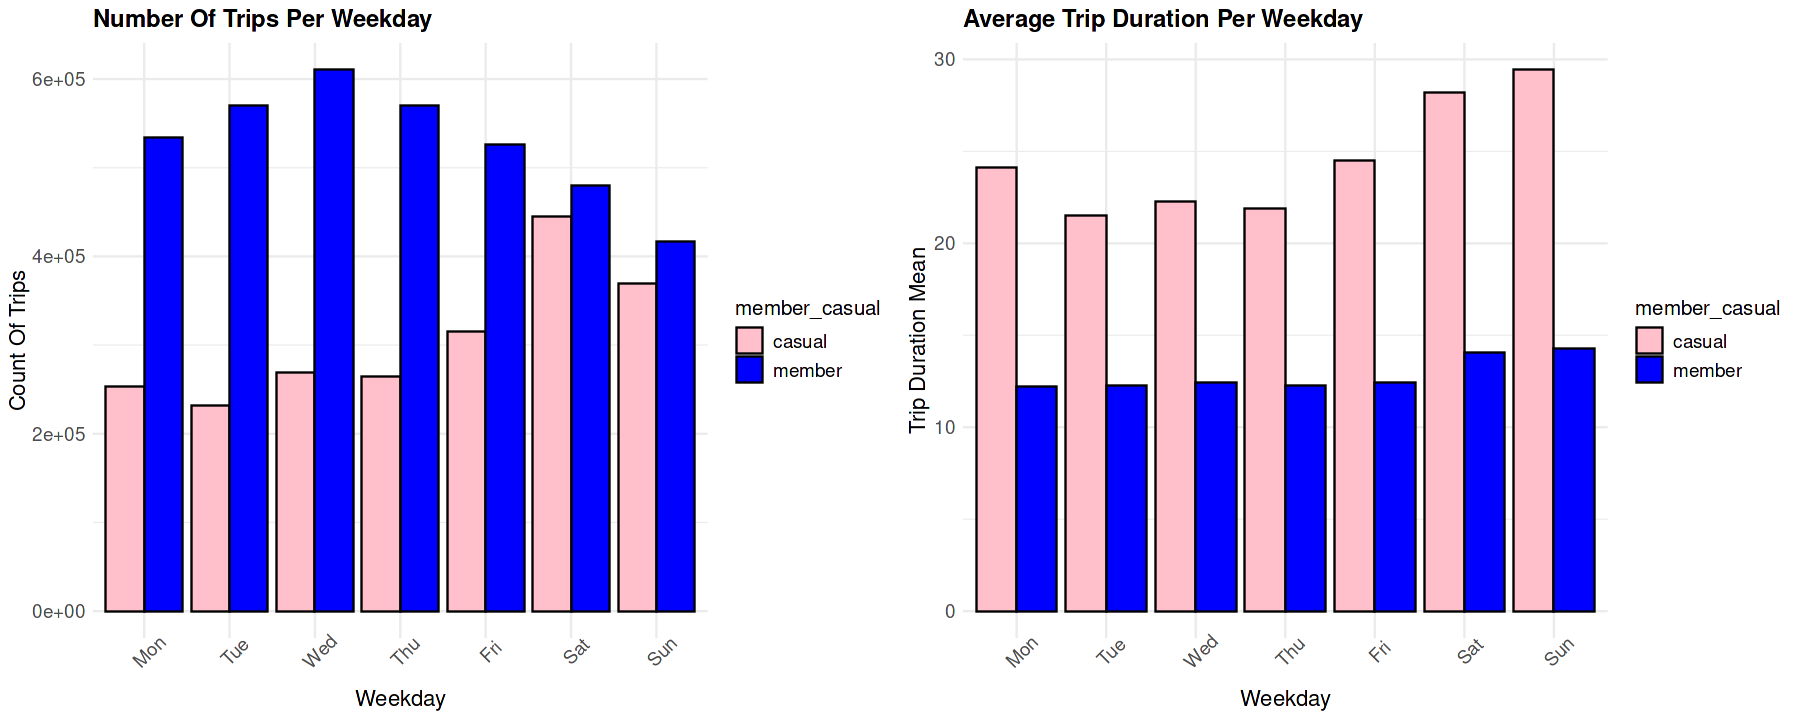

In [23]:
# visualizing our finding 
m1 <- ggplot( data = week) +
geom_col (mapping = aes(x = weekday, y = count_trip,fill= member_casual), color = "black", position = "dodge") +
scale_fill_manual (values = c("member" = "blue", "casual" = "pink")) +  #customuzing bar color
labs(title = "Number Of Trips Per Weekday", x = "Weekday", y = "Count Of Trips") +
theme_minimal() + #removing noise from our plot 
theme(axis.text.x = element_text(size = 11, angle =45),
      axis.text.y = element_text(size = 11),
      axis.title.y = element_text(size = 13),
      axis.title.x = element_text (size = 13),
      plot.title = element_text (size = 14, face = "bold"),
     legend.title = element_text (size =12),
     legend.text = element_text (size = 11))

m2 <- ggplot(data = week) +
geom_col(mapping = aes(x = weekday, y = mean_trip_minutes, fill = member_casual), color = "black", position = "dodge") +
scale_fill_manual(values = c("member" = "blue", "casual" = "pink")) +  # customize line color
labs(title = "Average Trip Duration Per Weekday", x = "Weekday", y = "Trip Duration Mean") +
theme_minimal() + #removing noise from our plot 
theme(axis.text.x = element_text(size = 11, angle =45),  #adjusting x axis label
      axis.text.y = element_text(size = 11),
      axis.title.y = element_text(size = 13),  
      axis.title.x = element_text (size = 13),
      plot.title = element_text (size = 14, face = "bold"),  #adjusting plot title
     legend.title = element_text (size = 12),  #adjusting legend title
     legend.text = element_text (size = 11 ))   # adjussting legend text

# increasing plot size
options(repr.plot.width = 15, repr.plot.height = 6)

# combing two plot together
grid.arrange (m1, m2, ncol = 2)


##### Number of Trips Per Weekday:
**Weekend trips**: "casual" users show a significant higher number of trips on weekends (Saturday and Sunday). This is likely due to more leisure trips while "member" riders have a lower number of trips compared to weekday.  
**Overall**: In general the number of member users are always higher than casual riders but in weekend the difference is significantly small.

##### Average Trip Duration Per Weekday:
**Casual Longer Trips**: In general, "casual" users tend to have longer average trip durations compared to "member" users across all days of the week.  
**Weekend Longest for Casual:** The average trip duration for "casual" users is notably higher on weekends, peaking on Sunday. This reinforces the idea that casual users are likely using the service for leisure activities, which tend to be longer on weekends.  
**Member Consistency:** "Member" users show a relatively stable average trip duration throughout the week, with a slight increase on weekends. This aligns with the idea of routine use, possibly for commuting or quick errands.

In [24]:
# obtaining the top 20 poplular stations for each user type
top_stations <- year_2024 %>% 
group_by(member_casual, start_station_name, start_lng, start_lat) %>%  #grouping by station locations
summarize( count = n(), .groups = "drop") %>%   #counting the number of trip from each station 
arrange(member_casual, desc(count)) %>%   # Sort within each user type 
group_by(member_casual) %>%   #regroup by member type
slice_head(n =20)  %>%    #choosing the top 20 stations
as.data.frame()   # Select the top 20 locations per user type

print(top_stations)

   member_casual                                        start_station_name
1         casual                           Streeter Dr & Grand Ave &NA &NA
2         casual                 DuSable Lake Shore Dr & Monroe St &NA &NA
3         casual                             Michigan Ave & Oak St &NA &NA
4         casual                DuSable Lake Shore Dr & North Blvd &NA &NA
5         casual                                   Millennium Park &NA &NA
6         casual                                    Shedd Aquarium &NA &NA
7         casual                                    Dusable Harbor &NA &NA
8         casual                               Theater on the Lake &NA &NA
9         casual                         1517 & North Dearborn Parkway &NA
10        casual                             Te'Jay's Adult Books & 53 &NA
11        casual                             Michigan Ave & 8th St &NA &NA
12        casual                                 Adler Planetarium &NA &NA
13        casual         

In [27]:
## visualizing the top 20 locations on the map
# Create a color palette for user type
pal <- colorFactor(c("blue", "red"), domain = c("member", "casual"))

# Create leaflet map
leaflet(top_stations) %>%
  addTiles() %>%  # Base map
  addCircleMarkers(
    ~start_lng, ~start_lat,  # Longitude and Latitude
    color = ~pal(member_casual),  # Color based on user type
    label = ~start_station_name,  # Hover text
    radius = ~count/ max(top_stations$count)* 20,  # Adjust marker size based on count
    stroke = FALSE, # remove marker borders
    fillOpacity = 0.7
  ) %>%
  addLegend(   #add a legend 
    "bottomright", 
    pal = pal, 
    values = ~member_casual, 
    title = "User Type",
    opacity = 1
  )


HTML widgets cannot be represented in plain text (need html)

##### Most Popular Stations 
The most frequented stations by **casual** riders are predominantly situated near recreational areas, such as beaches and parks, whereas **member** riders tend to favor stations located within commercial districts.

# Share
Now that i have found some insights about my data through analysis its time to share it. It is idea to be shared by presentation but due to limits it is not possible.

#### Key tasks
* Determine the best way to share your findings.
* Create effective data visualizations.
* Present your findings.
* Ensure your work is accessible.


#### Main Findings
- About 63% of the population is included by **member** and only 37% is included by **casual** riders
- In all the months the number of **members** are more than **casual** riders.
- The total spent time through the entire year for both groups is slightly different (member has spent 14% more time riding), despite the fact taht member contained most proportion of the population.
- The time **casual** riders use the bike is almost 100% more than **members**.

#### Casual Vs Member behaviors 
- Casual riders take longer trips, especially in summer, while members have shorter, frequent rides year-round.
- Members ride steadily throughout the day, peaking during commutes, whereas casual riders surge in the afternoon and on weekends.
- Members favor stations in commercial areas, while casual riders prefer locations near parks and beaches, likely for leisure.
- Both groups prefer e-bikes, with members using them for routine trips and casual riders for longer, recreational rides.

# Act 
In this step of analysis, i have to act on my findings. Prepare the
deliverables asked to create, including the three top recommendations based on
my analysis.

#### Recommendation 1:
Due to seasonal behavior of casual users i suggest having a seasonal membership. In this case, people are more intrigued to get a membership.

#### Recommendation 2:
The most frequanted stations for casaul riders are located near to leisur places, planning an event like cyclist race etc. could be helpful not only let them to realize the advantage of having a membership but also it can attract people who are not casual riders and make them possible customers.

#### Recommendation 3: 
Considering a discount only on weekedn afternoon for member could be helpful to intrique casual riders to get a membership.


  

* **consider the fact due to data-privacy issues prohibit me from using riders’ personally identifiable information.
This means that i couldnt be able to connect pass purchases to credit card numbers to
determine if casual riders live in the Cyclistic service area or if they have purchased multiple or single passes.**





### I`d love to hear your opinion about my notebook, so help me grow by leaving your comments about it.